<font face="Tahoma" size=5 color=#000000> import packages and data

In [140]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from random import randint

#load data
train_data = pd.read_csv('we_data/train.csv')
validation_data = pd.read_csv('we_data/validation.csv')
test_data = pd.read_csv('we_data/test.csv')

<font face="Tahoma" size=5 color=#000000> Problem2-1: Constant Bidding

In [44]:
#test
#data = train_data[:50000]
data = train_data

def constantBidding(constant, data = train_data):
    
    bidprice = np.repeat(constant,len(data))
    budget = 6250000

    #find who wins the bid
    payprice = data['payprice'].values
    win_bid = bidprice>payprice

    spend = np.cumsum(payprice*win_bid)
    enough_budget = spend<budget


    click =  np.sum(data['click'].values*win_bid*enough_budget)
    impression = np.sum(win_bid*enough_budget)
    spend = np.max(spend*enough_budget)
    ctr = click/impression*100
    cpm = spend/impression*1000
    cpc = spend/click

    return [constant,impression,click, ctr, spend, cpm, cpc]
         

In [45]:
def plotResult(result):
    plt.figure(figsize = (16,8))

    plt.subplot(2,3,1)
    plt.plot(result[0], result[2])
    plt.title("Clicks")
    plt.xlabel("bidprice")

    plt.subplot(2,3,2)
    plt.plot(result[0], result[3])
    plt.title("Click through rate")
    plt.xlabel("bidprice")

    plt.subplot(2,3,3)
    plt.plot(result[0], result[4])
    plt.title("spend")
    plt.xlabel("bidprice")

    plt.subplot(2,3,4)
    plt.plot(result[0], result[5])
    plt.title("Average Cost Per Mille")
    plt.xlabel("bidprice")

    plt.subplot(2,3,5)
    plt.plot(result[0], result[6])
    plt.title("Average Cost Per Click")
    plt.xlabel("bidprice")

    plt.subplots_adjust(hspace=0.3)
    
def plotResult2(result):
    
    plt.figure(figsize = (20,8))

    plt.subplot(1,2,1)
    plt.plot(result[0], result[2])
    plt.title("Clicks")
    plt.xlabel("bidprice")

    plt.subplot(1,2,2)
    plt.plot(result[0], result[3])
    plt.title("Click through rate")
    plt.xlabel("bidprice")
    
    plt.subplots_adjust(wspace=0.2)
    
def plotResult3(result):
    
    plt.figure(figsize = (24,6))

    plt.subplot(1,3,1)
    plt.plot(result[0], result[4])
    plt.title("spend")
    plt.xlabel("bidprice")
    

    plt.subplot(1,3,2)
    plt.plot(result[0], result[5])
    plt.title("Average Cost Per Mille")
    plt.xlabel("bidprice")

    plt.subplot(2,3,3)
    plt.plot(result[0], result[6])
    plt.title("Average Cost Per Click")
    plt.xlabel("bidprice")
    
    plt.subplots_adjust(wspace=0.2)

In [46]:
result = []
for bid_constant in range(1,301,1):
    result.append(constantBidding(bid_constant))

result = pd.DataFrame(result)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in long_scalars


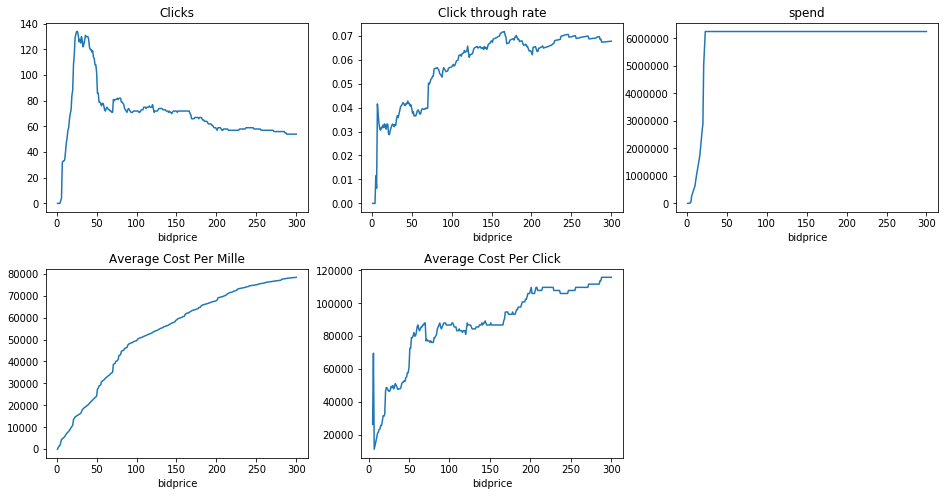

In [47]:
plotResult(result)
pylab.savefig('constant_1to300_1.png')

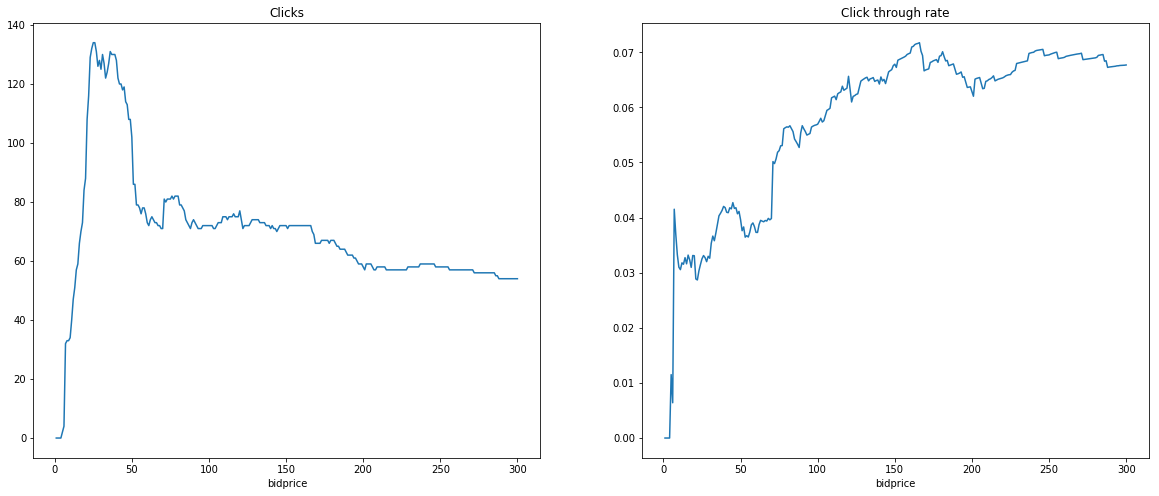

In [48]:
plotResult2(result)
pylab.savefig('constant_1to300_2.png')

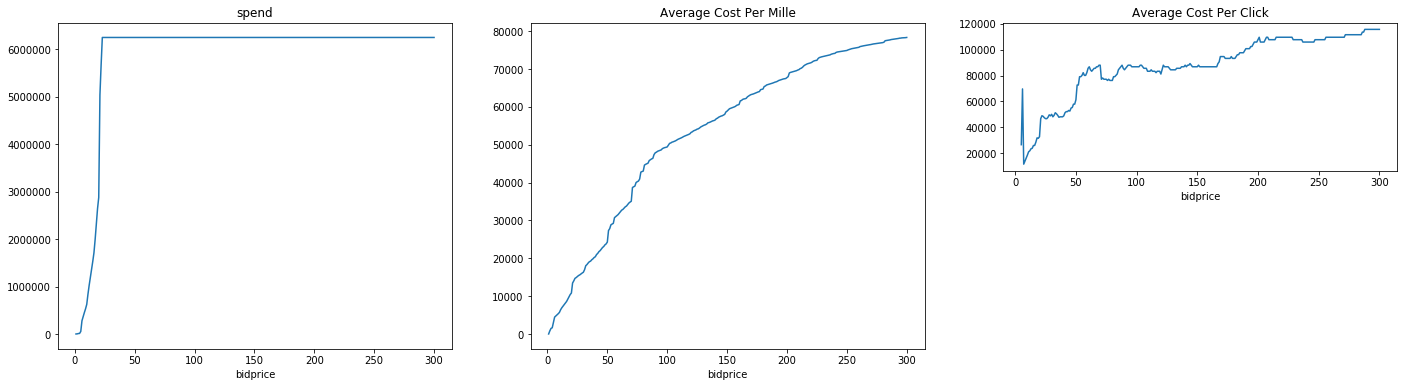

In [49]:
plotResult3(result)
pylab.savefig('constant_1to300_3.png')

In [50]:
result[2].max()

134

In [52]:
constant = 26
x = constantBidding(constant, data = validation_data)
x

[26, 60444, 16, 0.026470782873403483, 934656, 15463.172523327377, 58416.0]

<font face="Tahoma" size=5 color=#000000> Problem2-2: Random Bidding

In [13]:
data = train_data

def randomBidding(lower_bound, upper_bound, data = train_data):

    bidprice = np.random.randint(lower_bound, upper_bound, (1,len(data)))
    budget = 6250000

    #find who wins the bid
    payprice = data['payprice'].values
    win_bid = bidprice>payprice

    spend = np.cumsum(payprice*win_bid)
    enough_budget = spend<budget


    click =  np.sum(data['click'].values*win_bid*enough_budget)
    impression = np.sum(win_bid*enough_budget)
    spend = np.max(spend*enough_budget)
    ctr = click/impression*100
    cpm = spend/impression*1000
    cpc = spend/click

    return  [lower_bound, upper_bound,impression,click, ctr, spend, cpm, cpc]

In [25]:
def plotResult(result_click, result_ctr, result_spend, result_cpm, result_cpc):
    plt.figure(figsize = (16,24))

    plt.subplot(3,2,1)
    sns.heatmap(result_click, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Clicks")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplot(3,2,2)
    sns.heatmap(result_ctr, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Click through rate")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplot(3,2,3)
    sns.heatmap(result_spend, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("spend")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplot(3,2,4)
    sns.heatmap(result_cpm, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Average Cost Per Mille")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplot(3,2,5)
    sns.heatmap(result_cpc, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Average Cost Per Click")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplots_adjust(hspace=0.3)

    
def plotResult2(result_click, result_ctr, result_spend, result_cpm, result_cpc):
    plt.figure(figsize = (20,8))

    plt.subplot(1,2,1)
    sns.heatmap(result_click, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Clicks")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplot(1,2,2)
    sns.heatmap(result_ctr, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Click through rate")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplots_adjust(wspace=0.2)
    
def plotResult3(result_click, result_ctr, result_spend, result_cpm, result_cpc):
    plt.figure(figsize = (24,6))
    
    plt.subplot(1,3,1)
    sns.heatmap(result_spend, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("spend")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")
    

    plt.subplot(1,3,2)
    sns.heatmap(result_cpm, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Average Cost Per Mille")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplot(1,3,3)
    sns.heatmap(result_cpc, linewidth=0, xticklabels=bound, yticklabels=bound, cmap="YlGnBu")
    plt.title("Average Cost Per Click")
    plt.xlabel("lower bound")
    plt.ylabel("upper bound")

    plt.subplots_adjust(wspace=0.2)

In [26]:
bound = range(1,301,5)
result_impression = np.zeros(shape = [len(bound), len(bound)])
result_click = np.zeros([len(bound), len(bound)])
result_ctr = np.zeros([len(bound), len(bound)])
result_spend  = np.zeros([len(bound), len(bound)])
result_cpm = np.zeros([len(bound), len(bound)])
result_cpc = np.zeros([len(bound), len(bound)])


for lb in range(len(bound)):
    for ub in  range(len(bound)):
        if bound[lb] < bound[ub]:
            temp = randomBidding(bound[lb], bound[ub])
            result_click[ub][lb] = temp[3]
            result_ctr[ub][lb] = temp[4]
            result_spend[ub][lb] = temp[5]
            result_cpm[ub][lb] = temp[6]
            result_cpc[ub][lb] = temp[7]



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in long_scalars


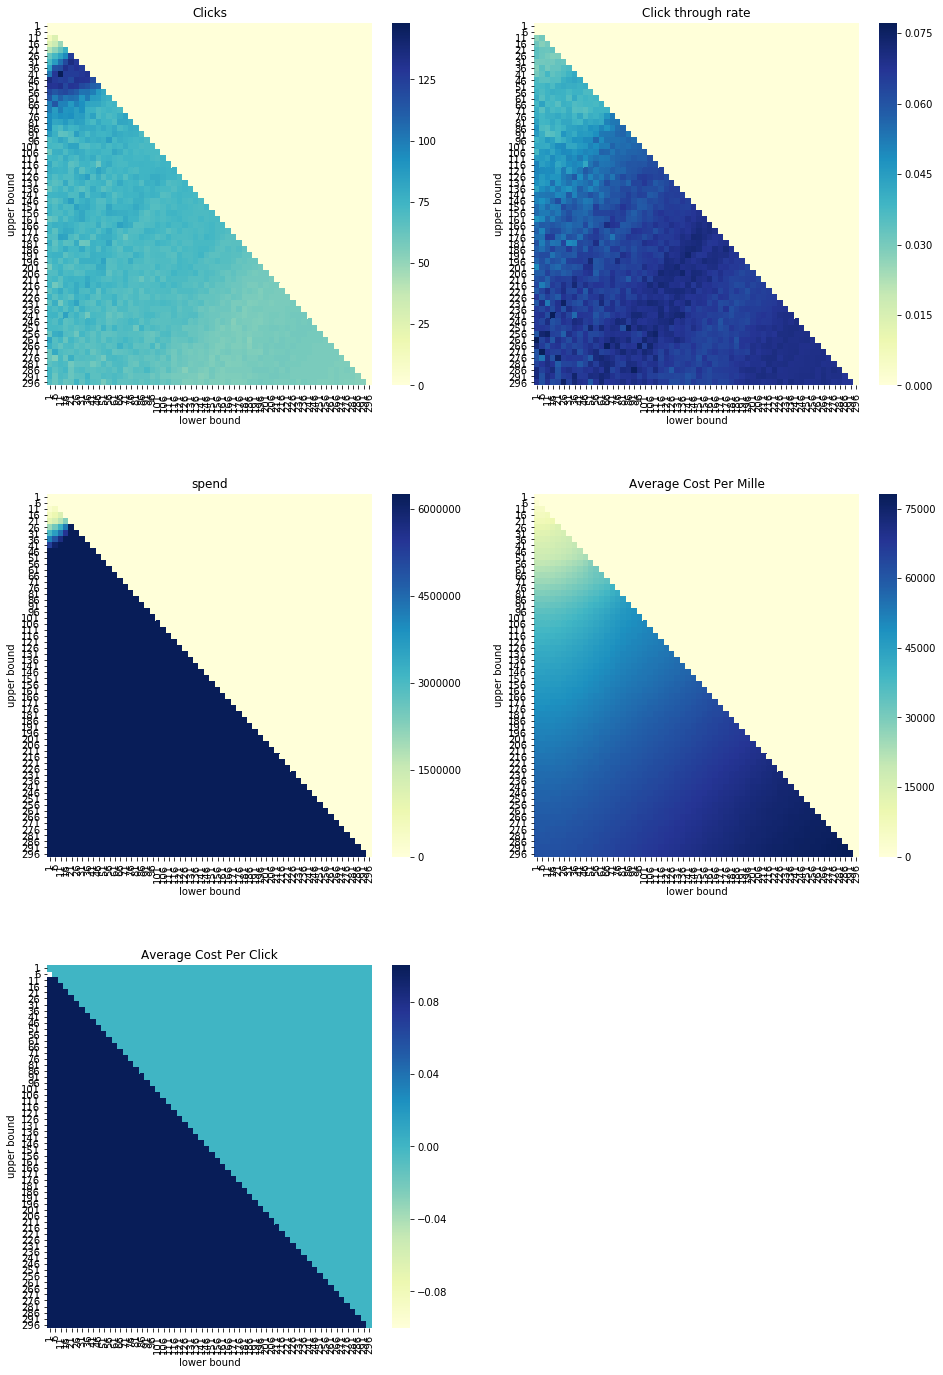

In [27]:
plotResult(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('randombid_1.png')

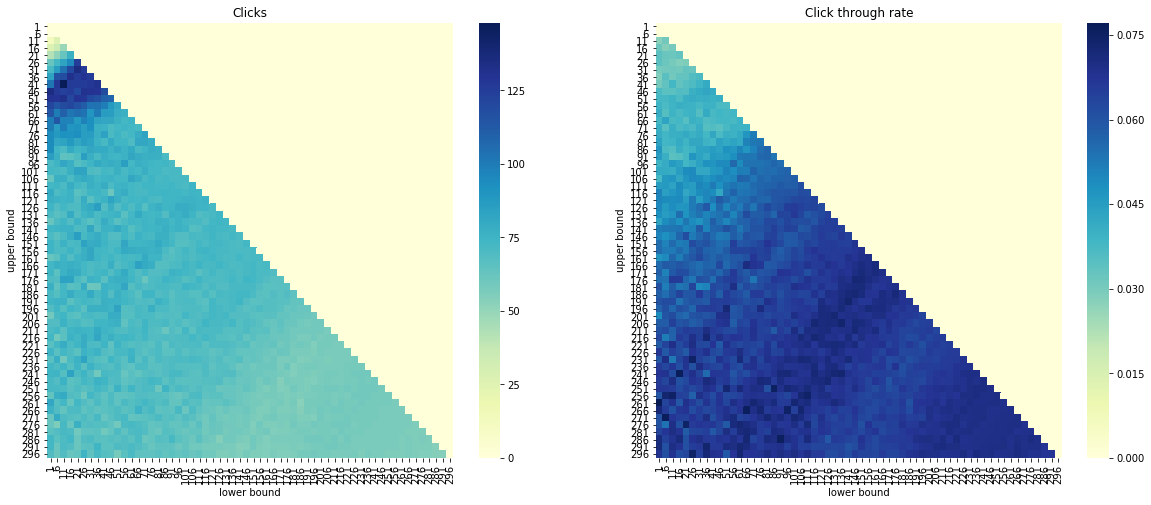

In [28]:
plotResult2(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('randombid_2.png')

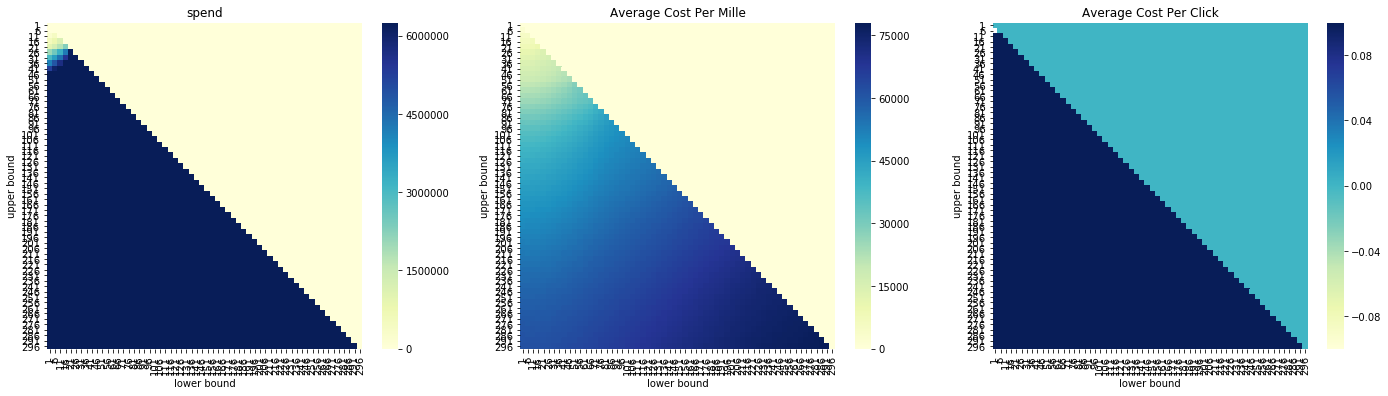

In [29]:
plotResult3(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('randombid_3.png')

In [14]:
#validation
randomBidding(16, 41, data = validation_data)

[16,
 41,
 60769,
 18,
 0.029620365646958153,
 1015720,
 16714.44321940463,
 56428.88888888889]

<font face="Tahoma" size=5 color=#000000> Problem2-3: Considering competition among homogeneous random bidding agents.

In [121]:
# data = train_data

# def MultiRandomBidding(lower_bound, upper_bound, n = 50):

#     bidprice = np.random.randint(lower_bound, upper_bound, (len(data),n))
#     budget = np.repeat(6250000,n)

#     #find who wins the bid
#     payprice = data['payprice'].values
#     max_bid = np.amax(bidprice, axis=1) 
#     win_index = np.argmax(bidprice, axis=1) 
#     win_bid = max_bid > payprice

# #     onehot_win_index = pd.get_dummies(win_index)
# #     spend_value = np.expand_dims((payprice*win_bid), axis=0)
# #     total_spend=spend_value@onehot_win_index
# #     enough_budget = total_spend<budget
    
#     onehot_win_index = pd.get_dummies(win_index)
#     spend_value = np.expand_dims((payprice*win_bid), axis=0)
#     total_spend=spend_value@onehot_win_index
#     enough_budget = total_spend<budget


#     click =  np.sum(data['click'].values*win_bid*enough_budget)
#     impression = np.sum(win_bid*enough_budget)
#     spend = np.max(spend*enough_budget)
#     ctr = click/impression*100
#     cpm = spend/impression*1000
#     cpc = spend/click

#     return  [lower_bound, upper_bound, n,impression,click, ctr, spend, cpm, cpc]

In [55]:
def MultiRandomBidding(lower_bound, upper_bound, n = 50, data = train_data):

    bidprice = np.random.randint(lower_bound, upper_bound, (len(data),n)) #generate a random bidprice matrix of len(data) * n
    budget = np.repeat(6250000,n)
    payprice = data['payprice'].values

    win_bid = np.repeat(False,len(data))

    enough_budget = []
    spend = 0
    #find who wins the bid
    for i in range(len(data)):
        bidprice_b = bidprice[i]*(budget != 0)# exclude the one woth no budget
        sort_index = np.argsort((-bidprice_b))
        
        for k in range(n): # if the first bidder have no enough budget then system will check if the scond bidder is able to purchase
            if k < n-1:
                final_payprice = max([payprice[i], bidprice_b[sort_index[k+1]]]) #pay the highest among payprice and other submitted bids
            else:
                final_payprice = payprice[i]
                
            if  budget[sort_index[k]] > final_payprice and bidprice_b[sort_index[k]] >payprice[i]:
                budget[sort_index[k]] -= final_payprice # check if the winner among n bidders have enough budget
                spend += final_payprice # calculate the total spend
                win_bid[i] = True # if all n agent have no enough budget then this bid will not be won by anyone
                break
            elif not bidprice_b[sort_index[k]] >payprice[i]:
                break

    

    click =  np.sum(data['click'].values*win_bid)
    impression = np.sum(win_bid)
    ctr = click/impression*100
    cpm = spend/impression*1000
    cpc = spend/click

    return  [lower_bound, upper_bound, n, impression,click, ctr, spend, cpm, cpc]




In [14]:
bound = range(1,305,30)
result_impression = np.zeros([len(bound), len(bound)])
result_click = np.zeros([len(bound), len(bound)])
result_ctr = np.zeros([len(bound), len(bound)])
result_spend  = np.zeros([len(bound), len(bound)])
result_cpm = np.zeros([len(bound), len(bound)])
result_cpc = np.zeros([len(bound), len(bound)])


for lb in range(len(bound)):
    for ub in  range(len(bound)):
        if bound[lb] < bound[ub]:
            temp =  MultiRandomBidding(bound[lb], bound[ub])
            result_click[ub][lb] = temp[4]
            result_ctr[ub][lb] = temp[5]
            result_spend[ub][lb] = temp[6]
            result_cpm[ub][lb] = temp[7]
            result_cpc[ub][lb] = temp[8]


In [ ]:
#save the result data

x1 = pd.DataFrame(result_click)
x2 = pd.DataFrame(result_ctr)
x3 = pd.DataFrame(result_spend)
x4 = pd.DataFrame(result_cpm)
x5 = pd.DataFrame(result_cpc)

x1.to_csv('result_click.csv')
x2.to_csv('result_ctr.csv')
x3.to_csv('result_spend.csv')
x4.to_csv('result_cpm.csv')
x5.to_csv('result_cpc.csv')

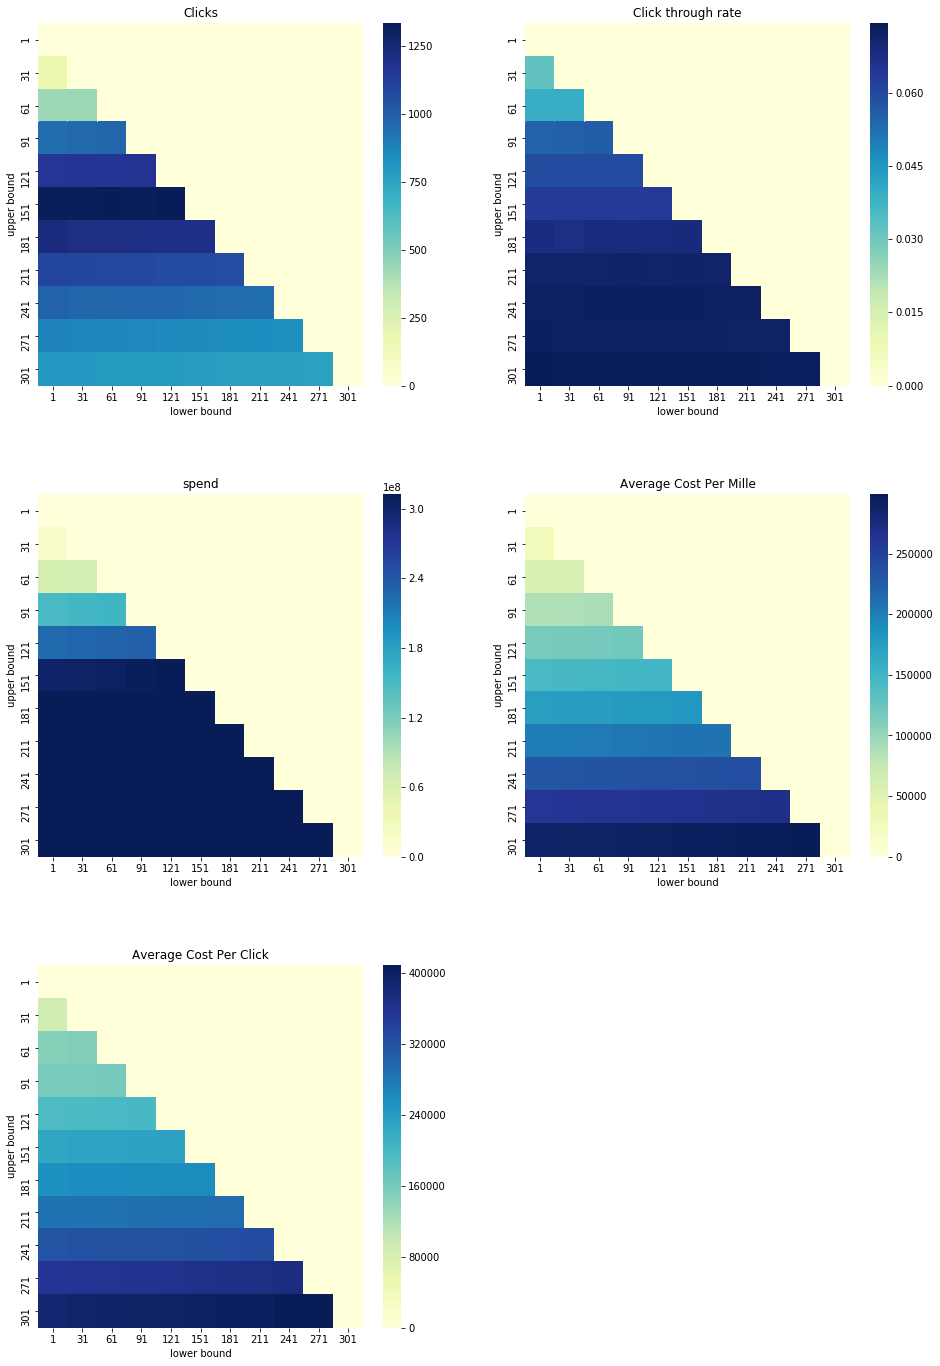

In [15]:
plotResult(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('multi_randombid_1.png')

In [34]:
train_data = pd.read_csv('pic&data_2-3(1)/result_click.csv')
train_data[]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,433.0,437.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,952.0,965.0,977.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1159.0,1164.0,1167.0,1171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1321.0,1326.0,1330.0,1327.0,1335.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,1229.0,1211.0,1215.0,1208.0,1202.0,1204.0,0.0,0.0,0.0,0.0,0.0
7,7,1100.0,1097.0,1091.0,1086.0,1078.0,1077.0,1066.0,0.0,0.0,0.0,0.0
8,8,986.0,979.0,977.0,973.0,970.0,964.0,956.0,949.0,0.0,0.0,0.0
9,9,877.0,873.0,869.0,864.0,859.0,855.0,847.0,842.0,837.0,0.0,0.0


In [33]:
bound = range(120,180,5)
result_impression = np.zeros([len(bound), len(bound)])
result_click = np.zeros([len(bound), len(bound)])
result_ctr = np.zeros([len(bound), len(bound)])
result_spend  = np.zeros([len(bound), len(bound)])
result_cpm = np.zeros([len(bound), len(bound)])
result_cpc = np.zeros([len(bound), len(bound)])


for lb in range(len(bound)):
    for ub in  range(len(bound)):
        if bound[lb] < bound[ub]:
            temp =  MultiRandomBidding(bound[lb], bound[ub])
            result_click[ub][lb] = temp[4]
            result_ctr[ub][lb] = temp[5]
            result_spend[ub][lb] = temp[6]
            result_cpm[ub][lb] = temp[7]
            result_cpc[ub][lb] = temp[8]



In [34]:
#save the result data

x1 = pd.DataFrame(result_click)
x2 = pd.DataFrame(result_ctr)
x3 = pd.DataFrame(result_spend)
x4 = pd.DataFrame(result_cpm)
x5 = pd.DataFrame(result_cpc)

x1.to_csv('result_click_2.csv')
x2.to_csv('result_ctr_2.csv')
x3.to_csv('result_spend_2.csv')
x4.to_csv('result_cpm_2.csv')
x5.to_csv('result_cpc_2.csv')

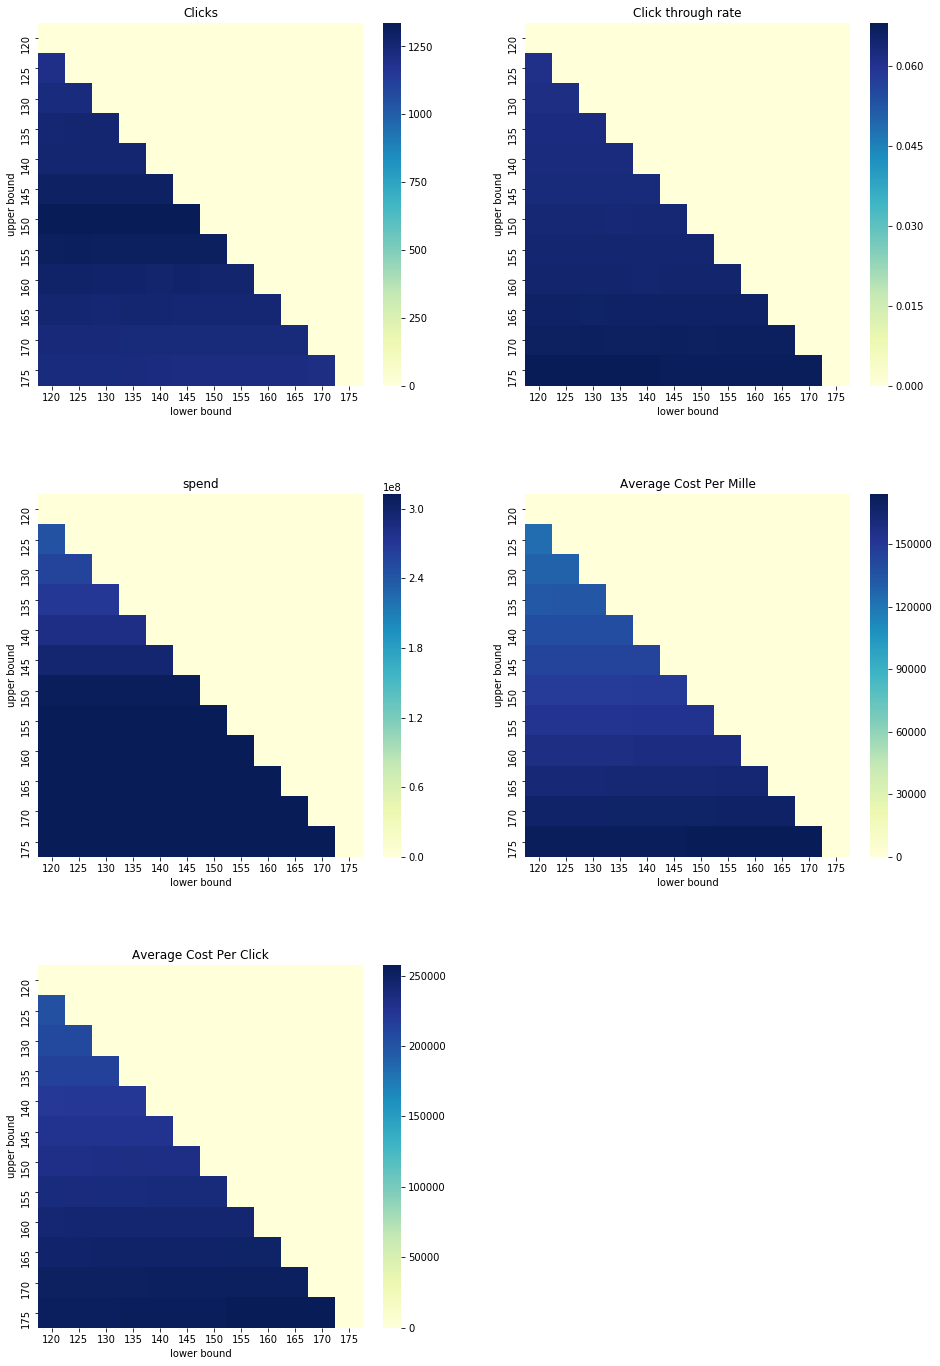

In [35]:
plotResult(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('multi_randombid_1.png')

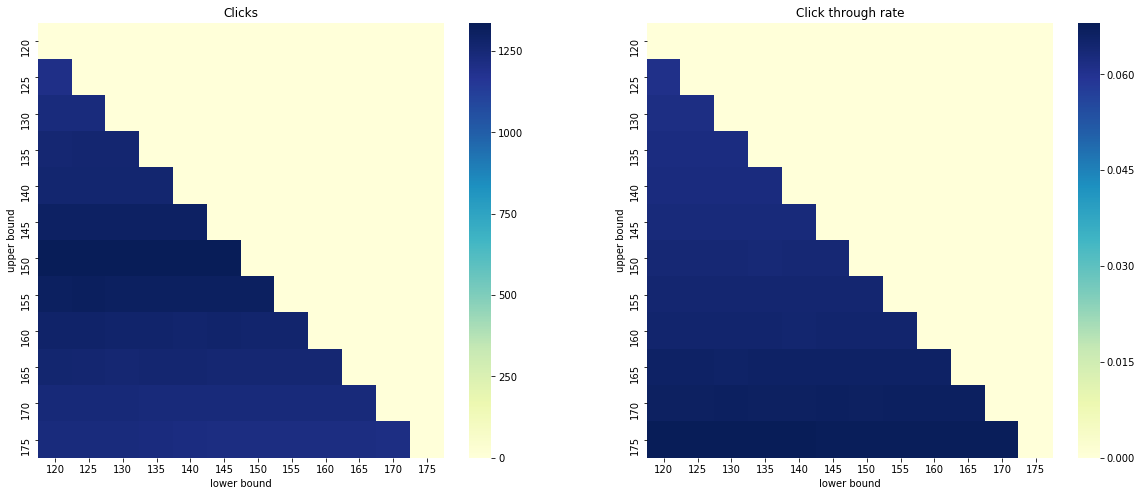

In [36]:
plotResult2(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('multi_randombid_2.png')

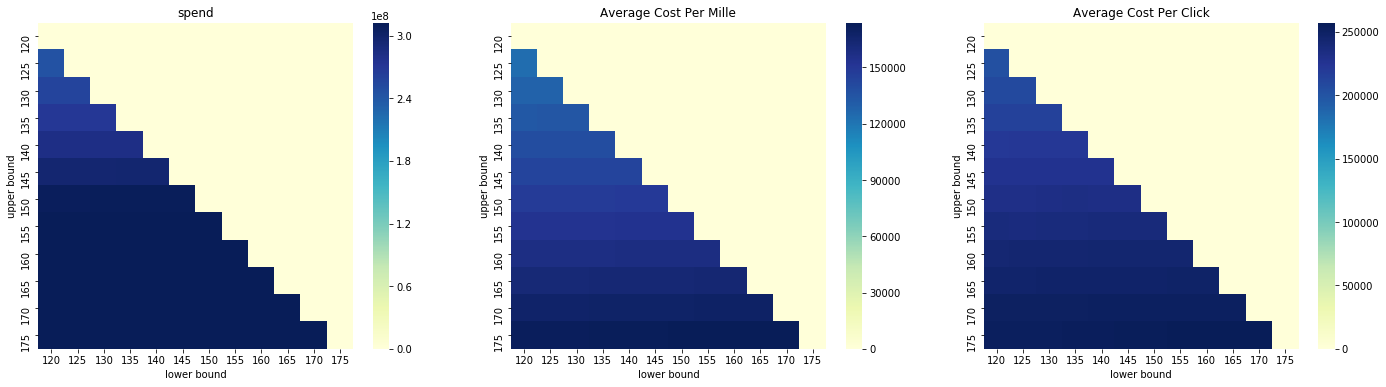

In [37]:
plotResult3(result_click, result_ctr, result_spend, result_cpm, result_cpc)
pylab.savefig('multi_randombid_3.png')

In [37]:
train_data = pd.read_csv('pic&data_2-3(2)/result_click_2.csv')
train_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1236.0,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1262.0,1263.0,1263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1273.0,1273.0,1273.0,1273.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1301.0,1303.0,1303.0,1303.0,1303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,1334.0,1334.0,1333.0,1331.0,1335.0,1336.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,1315.0,1318.0,1315.0,1314.0,1312.0,1311.0,1310.0,0.0,0.0,0.0,0.0,0.0
8,8,1287.0,1284.0,1283.0,1281.0,1278.0,1279.0,1278.0,1278.0,0.0,0.0,0.0,0.0
9,9,1269.0,1268.0,1262.0,1264.0,1263.0,1260.0,1260.0,1259.0,1259.0,0.0,0.0,0.0


In [148]:
# Evaluate on validation
result  = pd.DataFrame(columns = ["lower_bound", "upper_bound", "n", "impression","click", "ctr","spend","cpm","cpc"])   
lower_bound, upper_bound, n, impression,click, ctr, spend, cpm, cpc = MultiRandomBidding(145, 150, n = 50, data = validation_data)
result.loc[0]  = lower_bound, upper_bound, n, impression,click, ctr, spend, cpm, cpc
result

,lower_bound,upper_bound,n,impression,click,ctr,spend,cpm,cpc
0,145.0,150.0,50.0,260857.0,149.0,0.057119,38867646.0,148999.819825,260856.684564


In [166]:
result =[]

for i in range(50,101,5):
    result.append(MultiRandomBidding(145, 150, n = i, data =validation_data))

In [167]:
result = pd.DataFrame(result)
result 

,0,1,2,3,4,5,6,7,8
0,145,150,50,260857,149,0.057119,38867640,148999.796824,260856.644295
1,145,150,55,260857,149,0.057119,38867676,148999.934830,260856.885906
2,145,150,60,260857,149,0.057119,38867687,148999.976999,260856.959732
3,145,150,65,260857,149,0.057119,38867692,148999.996166,260856.993289
4,145,150,70,260857,149,0.057119,38867691,148999.992333,260856.986577
5,145,150,75,260857,149,0.057119,38867693,149000.000000,260857.000000
6,145,150,80,260857,149,0.057119,38867693,149000.000000,260857.000000
7,145,150,85,260857,149,0.057119,38867693,149000.000000,260857.000000
8,145,150,90,260857,149,0.057119,38867693,149000.000000,260857.000000
9,145,150,95,260857,149,0.057119,38867693,149000.000000,260857.000000


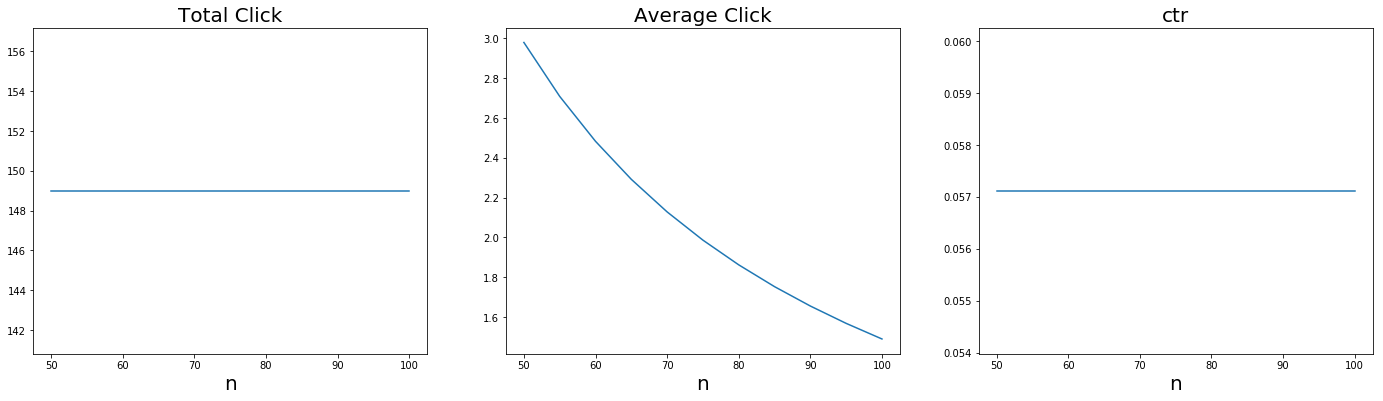

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize = (24,6))

plt.subplot(1,3,1)
plt.plot(result[2], result[4])
plt.title("Total Click", fontsize =20)
plt.xlabel("n", fontsize =20)
    

plt.subplot(1,3,2)
plt.plot(result[2], (result[4]/result[2]))
plt.title("Average Click",fontsize =20)
plt.xlabel("n",fontsize =20)

plt.subplot(1,3,3)
plt.plot(result[2], result[5])
plt.title("ctr",fontsize =20)
plt.xlabel("n",fontsize =20)
    
plt.savefig(os.path.join('pic2-3', 'impactofn.png'), format='png', dpi=300)

In [165]:
pylab.savefig('impactofn.png')

<Figure size 432x288 with 0 Axes>